# TensorFlow Regression example part One

## Our steps are:

1. Build a Graph
2. Initiate the Session
3. Feed Data in and get Output

Let's code along with a more realicstic regression example and introduce tf.estimator

In [102]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [103]:
import tensorflow as tf

In [104]:
x_data = np.linspace(0.0,10.0,1000000)

In [105]:
noise = np.random.randn(len(x_data))

In [106]:
noise.shape

(1000000,)

y = mx + b

b = 5

In [107]:
y_true = (0.5 * x_data) + 5 + noise

In [108]:
x_df = pd.DataFrame(data = x_data, columns=['X Data'])

In [109]:
y_df = pd.DataFrame(data= y_true,columns=['Y Data'])

In [110]:
x_df.head()

,X Data
0,0.00000
1,0.00001
2,0.00002
3,0.00003
4,0.00004


In [111]:
my_data = pd.concat([x_df,y_df],axis=1)

In [112]:
my_data.head()

,X Data,Y Data
0,0.00000,5.851889
1,0.00001,5.308985
2,0.00002,4.392312
3,0.00003,4.971446
4,0.00004,4.753309


<AxesSubplot:xlabel='X Data', ylabel='Y Data'>

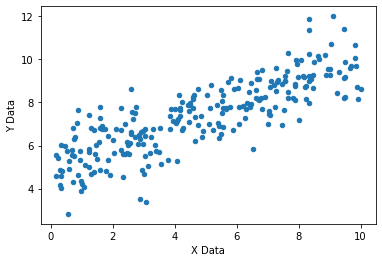

In [113]:
my_data.sample(n=250).plot(kind='scatter',x='X Data',y='Y Data')

In [114]:
#bacthes of data 8 out of a million a time

batch_size = 8

In [115]:
m = tf.compat.v1.Variable(0.65)
b = tf.compat.v1.Variable(0.34)

In [116]:
x_ph = tf.compat.v1.placeholder(tf.float32,[batch_size])


RuntimeError: tf.placeholder() is not compatible with eager execution.

In [ ]:
y_ph = tf.compat.v1.placeholder(tf.float32,[batch_size])

In [ ]:
y_model = m* x_ph + b

In [ ]:
# loss function

error = tf.reduce_sum(tf.square(y_ph-y_model))

In [ ]:
optimizer = tf.compat.v1.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimizer.minimize(error)

In [ ]:
init = tf.compat.v1.global_variables_initializer()

In [84]:
with tf.compat.v1.Session() as sess:

    sess.run(init)

    batches = 1000

    for i in range(batches):

        rand_ind = np.random.randint(len(x_data),size=batch_size) # takes 8 random data points from the data set

        feed = {x_ph:x_data[rand_ind],y_ph:y_true[rand_ind]}

        sess.run(train,feed_dict=feed)

    model_m , model_b = sess.run(m,b)

NameError: name 'init' is not defined

In [85]:
model_m

NameError: name 'model_m' is not defined